In [321]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score
from sklearn.metrics import roc_curve
from sklearn import ensemble
from sklearn import linear_model
from sklearn import tree
from sklearn import neighbors
from sklearn import naive_bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

%matplotlib inline

In [4]:
data = pd.read_excel("data_with_rating.xlsx")

In [5]:
data.head(5)

,sl,Rating,Reviews
0,0,3,No doubt it has a great bass and to a great ex...
1,1,1,"This earphones are unreliable, i bought it bef..."
2,2,4,"i bought itfor 999,I purchased it second time,..."
3,3,5,Its Awesome... Good sound quality & 8-9 hrs ba...
4,4,1,"After 11 days, the charging port isn't working..."


In [6]:
data.drop(["sl"],axis=1,inplace=True)

In [7]:
data.sample(5)

,Rating,Reviews
1306,4,boAt - comfortable enough when used while in u...
2552,5,No doubt it does quality job... Especially whe...
4777,1,After couple of week using this..i would say ....
917,1,Everything is good but durability sucks and th...
3131,4,This a good budget blietooth headphone.good go...


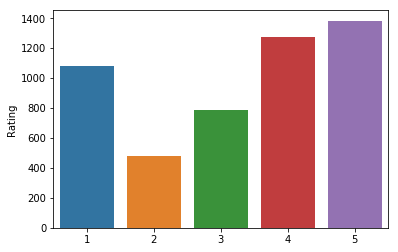

In [8]:
sns.barplot(x=[1,2,3,4,5],y=data["Rating"].value_counts().sort_index(),data=data)

In [9]:
data["Rating"].value_counts()

5    1383
4    1271
1    1083
3     784
2     481
Name: Rating, dtype: int64

## >=4 = 1   [  1 for possitive reviews]
## <4 = 0  [ 0 for negative reviews ]

In [10]:
data.Rating = (data["Rating"]>=4).astype(np.int)

In [11]:
data["Rating"].value_counts()

1    2654
0    2348
Name: Rating, dtype: int64

In [12]:
data.head()

,Rating,Reviews
0,0,No doubt it has a great bass and to a great ex...
1,0,"This earphones are unreliable, i bought it bef..."
2,1,"i bought itfor 999,I purchased it second time,..."
3,1,Its Awesome... Good sound quality & 8-9 hrs ba...
4,0,"After 11 days, the charging port isn't working..."


In [100]:
punc=re.compile(r'[-%<>.?!,:;#/\\()@^~`$₹+\'*&_{}=|0-9]')  # All special characters

In [101]:
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        "\u200b"
        "\n"
        "❌▶◾✔️➕➖•❤•●⭐🤝✌🤟🤩🤪🤣🤗"         "]+", flags=re.UNICODE)

In [102]:
reviews=[]         # All reviews sentences
for i in data.Reviews:
    temp = emoji_pattern.sub(" ",i)
    temp = punc.sub(r" ",temp)
    reviews.append(temp)

In [103]:
len(reviews)

5002

In [131]:
reviews_corp = []        # creating a word corpus
for i in reviews:
    for j in i.split():
        if len(j)>1:
            reviews_corp.append(j.lower())

In [110]:
len(reviews_corp)

238011

In [111]:
from collections import Counter

In [140]:
Counter(reviews_corp)

Counter({'no': 822,
         'doubt': 60,
         'it': 6755,
         'has': 544,
         'great': 721,
         'bass': 1518,
         'and': 5629,
         'to': 4484,
         'extent': 19,
         'noise': 1030,
         'cancellation': 771,
         'decent': 236,
         'sound': 3125,
         'clarity': 159,
         'mindblowing': 8,
         'battery': 1954,
         'but': 2820,
         'the': 8536,
         'following': 10,
         'dissapointed': 14,
         'me': 583,
         'though': 162,
         'tried': 122,
         'lot': 127,
         'adjust': 33,
         'bluetooth': 1335,
         'range': 664,
         'not': 3281,
         'more': 594,
         'than': 631,
         'pain': 105,
         'in': 3248,
         'ear': 802,
         'due': 115,
         'conical': 8,
         'buds': 160,
         'can': 1112,
         'be': 770,
         'removed': 18,
         'wires': 89,
         'are': 1377,
         'bit': 244,
         'long': 381,
         'whic

In [141]:
reviews_corp =list(set(reviews_corp))  # Removing the duplicate words

In [142]:
len(reviews_corp)

7895

In [153]:
X_array=[]                       # creating counter vector format
for i in data.Reviews:
    temp = emoji_pattern.sub(" ",i.lower())
    temp = punc.sub(r" ",temp)
    temp = temp.split()
    mat=[]
    for j in reviews_corp:
        mat.append(temp.count(j))
    X_array.append(mat)

In [154]:
X_count_vect = pd.DataFrame(X_array,columns=reviews_corp)

In [155]:
X_count_vect.shape

(5002, 7895)

In [293]:
X_count_vect = np.array(X_count_vect)

In [295]:
X_count_vect.shape

(5002, 7895)

In [167]:
y=data.Rating

In [169]:
y.shape

(5002,)

In [296]:
y=np.array(y)

In [297]:
y.shape

(5002,)

In [298]:
X_train,X_test,y_train,y_test=train_test_split(X_count_vect,y,test_size=0.25,random_state=5)

In [254]:
def reports(ytrue,predicted):
    print("Accuracy : {}".format(metrics.accuracy_score(ytrue,predicted)))
    print("Precision : {}".format(metrics.precision_score(ytrue,predicted)))
    print("Recall : {}".format(metrics.recall_score(ytrue,predicted)))
    print("Logloss : {}".format(metrics.log_loss(ytrue,predicted)))
    print("AUC : {}".format(metrics.roc_auc_score(ytrue,predicted)))
    print("Confusion Matrix : \n{}".format(metrics.confusion_matrix(ytrue,predicted)))

In [314]:
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [315]:
knn_pred = knn.predict(X_test)

In [316]:
reports(y_test,knn_pred)

Accuracy : 0.6442845723421263
Precision : 0.6426666666666667
Recall : 0.7314112291350531
Logloss : 12.28614691274704
AUC : 0.6393542632161753
Confusion Matrix : 
[[324 268]
 [177 482]]


In [327]:
def all_models(X_train,y_train,X_test,y_test):
    rfst=ensemble.RandomForestClassifier(n_estimators=10)
    rfst.fit(X_train,y_train)
    rfst_pred =rfst.predict(X_test)
    print("\n\nFor Random Forest\n")
    reports(y_test,rfst_pred)
    
    fpr, tpr, thresholds = roc_curve(y_test,rfst_pred)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(fpr, tpr, marker='.')
    plt.show()
    
    dst = tree.DecisionTreeClassifier()
    dst.fit(X_train,y_train)
    dst_pred = dst.predict(X_test)
    print("\n\nFor Decision Tree\n")
    reports(y_test,dst_pred)
    
    fpr, tpr, thresholds = roc_curve(y_test,dst_pred)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(fpr, tpr, marker='.')
    plt.show()
    
    
    lgs = linear_model.LogisticRegression()
    lgs.fit(X_train,y_train)
    lgr_pred=lgs.predict(X_test)
    print("\n\nFor Logistic Regression\n")
    reports(y_test,lgr_pred)
    
    fpr, tpr, thresholds = roc_curve(y_test,lgr_pred)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(fpr, tpr, marker='.')
    plt.show()
    
    
    clf1= GaussianNB()
    clf1.fit(X_train,y_train)
    y_pred_gnb=clf1.predict(X_test)
    print("\n\nFor GNB\n")
    reports(y_test,y_pred_gnb)
    
    fpr, tpr, thresholds = roc_curve(y_test,y_pred_gnb)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(fpr, tpr, marker='.')
    plt.show()
    
    
    
    clf2= MultinomialNB()
    clf2.fit(X_train,y_train)
    y_pred_mnb=clf2.predict(X_test)
    print("\n\nFor MNB\n")
    reports(y_test,y_pred_mnb)
    
    fpr, tpr, thresholds = roc_curve(y_test,y_pred_mnb)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(fpr, tpr, marker='.')
    plt.show()
    



For Random Forest

Accuracy : 0.7665867306155076
Precision : 0.7945425361155698
Recall : 0.7511380880121397
Logloss : 8.061890532202225
AUC : 0.7674609358979617
Confusion Matrix : 
[[464 128]
 [164 495]]


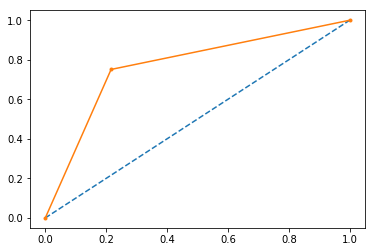



For Decision Tree

Accuracy : 0.7218225419664268
Precision : 0.7303703703703703
Recall : 0.7481031866464339
Logloss : 9.608025349449411
AUC : 0.7203353771070007
Confusion Matrix : 
[[410 182]
 [166 493]]


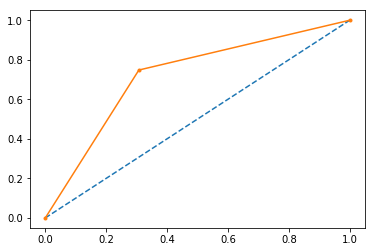

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)




For Logistic Regression

Accuracy : 0.8113509192645884
Precision : 0.821917808219178
Recall : 0.8194233687405159
Logloss : 6.515783199119308
AUC : 0.8108941168026904
Confusion Matrix : 
[[475 117]
 [119 540]]


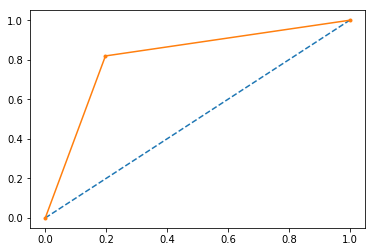



For GNB

Accuracy : 0.6123101518784972
Precision : 0.7121951219512195
Recall : 0.44309559939301973
Logloss : 13.390408396505551
AUC : 0.6218856375343477
Confusion Matrix : 
[[474 118]
 [367 292]]


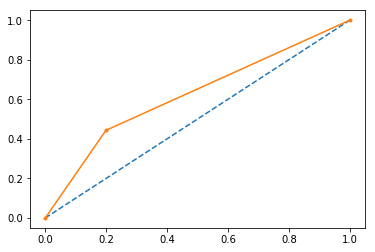



For MNB

Accuracy : 0.815347721822542
Precision : 0.7997198879551821
Recall : 0.866464339908953
Logloss : 6.377755147607424
AUC : 0.8124551429274495
Confusion Matrix : 
[[449 143]
 [ 88 571]]


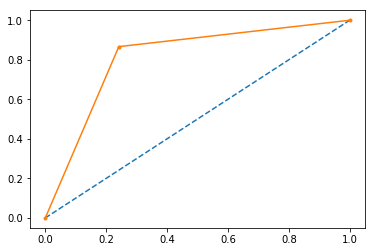

In [328]:
all_models(X_train,y_train,X_test,y_test)

In [349]:
def sent_vector(sent):
    global emoji_pattern
    global punc
    global reviews_corp
    X_array=[]
    temp = emoji_pattern.sub(" ",sent.lower())
    temp = punc.sub(r" ",temp)
    temp = temp.split()
    for j in reviews_corp:
        X_array.append(temp.count(j))
    return(np.array(X_array))

In [370]:
def manual_prediction(inp_arr):

    result=[]
    lgs = linear_model.LogisticRegression()
    lgs.fit(X_train,y_train)
    lgr_pred=lgs.predict([inp_arr])
    result.append(["Logistic Regression",lgr_pred])
    
    rfst=ensemble.RandomForestClassifier(n_estimators=10)
    rfst.fit(X_train,y_train)
    rfst_pred =rfst.predict([inp_arr])
    result.append(["Random Forest",rfst_pred])
    
    dst = tree.DecisionTreeClassifier()
    dst.fit(X_train,y_train)
    dst_pred = dst.predict([inp_arr])
    result.append(["Decision Tree",dst_pred])
    
    clf1= GaussianNB()
    clf1.fit(X_train,y_train)
    y_pred_gnb=clf1.predict([inp_arr])
    result.append(["Gaussian NB",y_pred_gnb])
    
    clf2= MultinomialNB()
    clf2.fit(X_train,y_train)
    y_pred_mnb=clf2.predict([inp_arr])
    result.append(["Multinomial NB",y_pred_mnb])

    
    
    for i in result:
        print("\n\n------------------")
        print (i[0]," Algorithm's Prediction :")
        if(i[1]):
            print("Possitive Review !")
        else:
            print("Negative Review !")
            

In [371]:
inp_arr=sent_vector("this is a good headphone.Highly recommended.")
manual_prediction(inp_arr)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)




------------------
Logistic Regression  Algorithm's Prediction :
Possitive Review !


------------------
Random Forest  Algorithm's Prediction :
Possitive Review !


------------------
Decision Tree  Algorithm's Prediction :
Possitive Review !


------------------
Gaussian NB  Algorithm's Prediction :
Negative Review !


------------------
Multinomial NB  Algorithm's Prediction :
Possitive Review !


# We are selecting the Logistic Regression Algorith because its provide us the best precission score 0.82

In [372]:
inp_arr=sent_vector("this is a bad headphone.not recommended.")
manual_prediction(inp_arr)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)




------------------
Logistic Regression  Algorithm's Prediction :
Negative Review !


------------------
Random Forest  Algorithm's Prediction :
Negative Review !


------------------
Decision Tree  Algorithm's Prediction :
Negative Review !


------------------
Gaussian NB  Algorithm's Prediction :
Negative Review !


------------------
Multinomial NB  Algorithm's Prediction :
Negative Review !
